First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Statistical summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%       

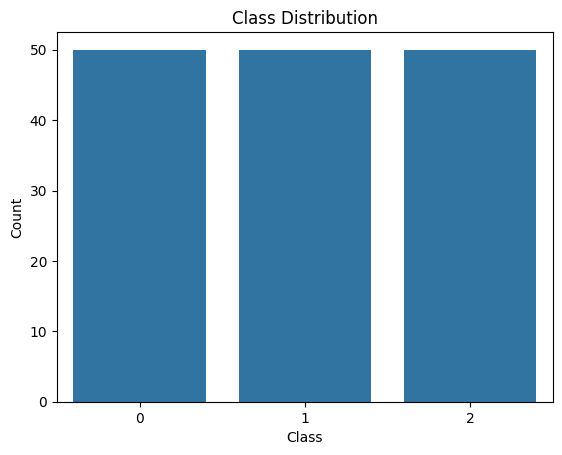


Confusion Matrix:
[[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


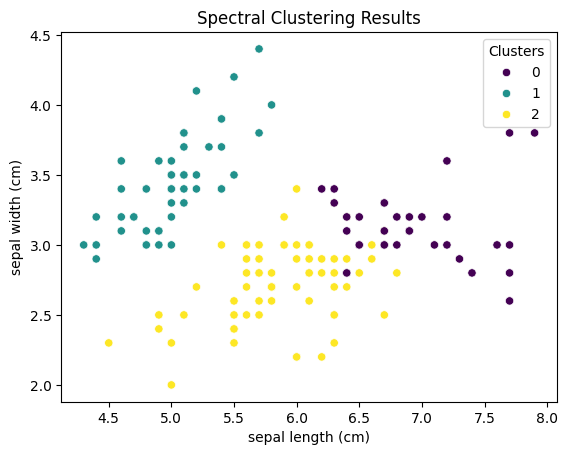


Summary:
1. The dataset was loaded and basic analysis performed.
2. Spectral clustering was applied to the standardized data.
3. The confusion matrix shows alignment between actual classes and predicted clusters.
4. Results were visualized to understand clustering performance.


In [1]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and create DataFrame
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# View the first few rows
print("First few rows of the dataset:")
print(data.head())

# Step 2: Get basic statistical characteristics
print("\nStatistical summary:")
print(data.describe())

# Step 3: Visualize class distribution
sns.countplot(x='target', data=data)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Step 4: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, :-1])

# Step 5: Perform spectral clustering
spectral_model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
clusters = spectral_model.fit_predict(X_scaled)

# Add clusters to DataFrame
data['cluster'] = clusters

# Step 6: Compare predicted clusters and actual classes
conf_matrix = confusion_matrix(data['target'], data['cluster'])
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 7: Visualize clustering results
sns.scatterplot(
    x=data.iloc[:, 0], y=data.iloc[:, 1],
    hue=data['cluster'], palette='viridis'
)
plt.title('Spectral Clustering Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Clusters')
plt.show()

# Summary
print("\nSummary:")
print("1. The dataset was loaded and basic analysis performed.")
print("2. Spectral clustering was applied to the standardized data.")
print("3. The confusion matrix shows alignment between actual classes and predicted clusters.")
print("4. Results were visualized to understand clustering performance.")
